# Data analysis of new energy vehicles in China

Author: Kaiyuan Chen

Course Project, UC Irvine, Math10, Fall 2024

I would like to post my notebook on the course website.   Yes

## 1, Introduction

In modern society, the development of new energy vehicles has formed a trend. This is not only the needs of the applicable people, but also the inevitable step of technological advancement. The popularity of electric vehicles is a good testimony to the development of new energy. It is worth mentioning that my family is engaged in new energy technology companies. Influenced by my family environment, I also plan to conduct data-based research on the popularity of electric vehicles in the world.

I am from mainland China and I participated in an internship related to China vehicles Insurance Analysis, so in addition to macroscopic analysis of the world market, my analysis will also pay more attention to the data of the Chinese NEVs market.

## 2, Background

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import linear_model
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import r2_score, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
evs1=pd.read_csv('IEA-EV-dataEV salesCarsHistorical.csv')

In [3]:
evs1.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49
1,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170
2,Australia,Historical,EV sales,Cars,PHEV,2012,Vehicles,80
3,Australia,Historical,EV sales,Cars,PHEV,2013,Vehicles,100
4,Australia,Historical,EV sales,Cars,BEV,2013,Vehicles,190


This table records EVs sales value data for all major economies in the world from 2011 to 2035, and contains a certain forecast component. We firstly focus on BEV powertrain EV. All the data in this part would be based on BEV powertrain.

In [4]:
evs=evs1[evs1['powertrain']=='BEV']
evsCN=evs[evs['region']=='China']
evsIN=evs[evs['region']=='India']
evsEU=evs[evs['region']=='Europe']
evsBR=evs[evs['region']=='Brazil']
evsJP=evs[evs['region']=='Japan']
evsUS=evs[evs['region']=='USA']
evs=evs[evs['year']=='2022']

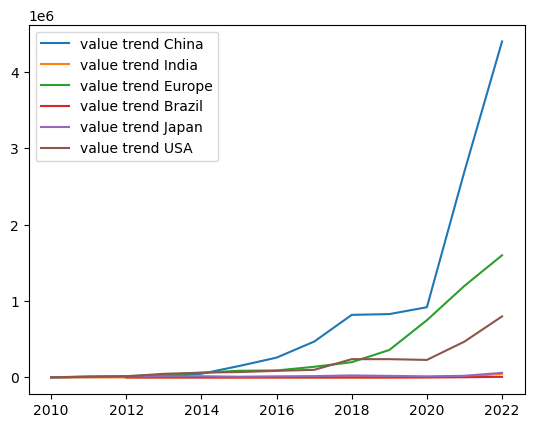

In [5]:
plt.plot(evsCN['year'],evsCN['value'],label='value trend China')
plt.plot(evsIN['year'],evsIN['value'],label='value trend India')
plt.plot(evsEU['year'],evsEU['value'],label='value trend Europe')
plt.plot(evsBR['year'],evsBR['value'],label='value trend Brazil')
plt.plot(evsJP['year'],evsJP['value'],label='value trend Japan')
plt.plot(evsUS['year'],evsUS['value'],label='value trend USA')
plt.legend()

The sales value of electric cars has increased significantly around 2020, especially in China. The increase in the value of electric cars in China has surpassed most other mainstream economies in horizontal comparison. Based on this, we can try to explore what changes have taken place in China's EV market in recent times, and why this industry can achieve exponential development in China.

## 3, Looking for reasons

Based on the report "China-green-future-ev-ch-jan2021" from international council on clean transportation, We can summarize the reasons why China is committed to new energy vehicles as follows:

1: The government hopes to mitigate the huge carbon emissions caused by rapid industrialization in China

2: The government hopes to strengthen China's international brand competitiveness in the automotive field

### Carbon emissions

In [6]:
carbon=pd.read_csv('Carbon_(CO2)_Emissions_by_Country.csv')
carbon=carbon[carbon['Country']=='China']
carbon['Date'] = pd.to_datetime(carbon['Date'])
carbon['Date']=carbon['Date'].dt.year
##I only collected data before 2020, because this is a node time for the development of new energy. We can also predict future carbon emissions to understand the necessity of new energy.

In [7]:
carbon=carbon.iloc[::-1]
carbon.head()

,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita
1079,China,Asia,1990,2173360.0,1.91
1078,China,Asia,1991,2302180.0,2.00
1077,China,Asia,1992,2418180.0,2.08
1076,China,Asia,1993,2645410.0,2.24
1075,China,Asia,1994,2767670.0,2.32


In [8]:
carbon1= carbon.copy()
p = 3
for lag in range(1, p+1):
    carbon1[f'Value_t-{lag}'] = carbon1['Kilotons of Co2'].shift(lag)
carbon1=carbon1.dropna()

In [9]:
d=np.array(carbon)
l=[d[0] for d in d]
c1=d[:int(0.5*len(l))]
train_carbon=pd.DataFrame({'Time':c1[:,2],'Value':c1[:,3]})
c2=d[int(0.5*len(l)):]
test_carbon=pd.DataFrame({'Time':c2[:,2],'Value':c2[:,3]})

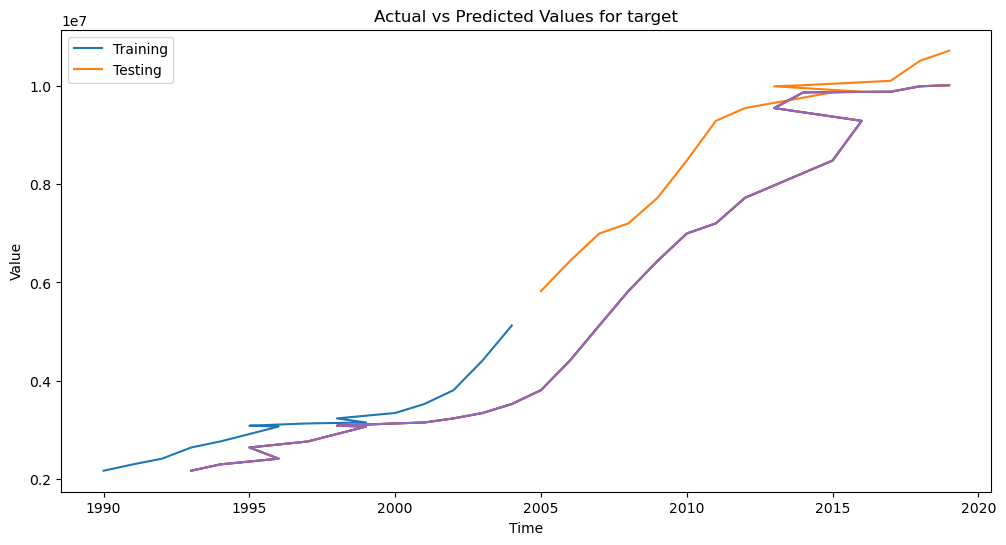

In [10]:
reg=LinearRegression()

x=np.array(carbon1['Date']).reshape(-1,1)
y=np.array(carbon1['Kilotons of Co2']).reshape(-1,1)
reg.fit(x,y)
y1=np.array(carbon1['Date'])


plt.figure(figsize=(12, 6))
plt.plot(train_carbon['Time'], train_carbon['Value'], label=f'Training')
plt.plot(test_carbon['Time'], test_carbon['Value'], label=f'Testing')
for l in range(1,p+1):
    plt.plot(carbon1['Date'],carbon1[f'Value_t-{lag}'])
plt.title(f'Actual vs Predicted Values for target')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

Judging from this prediction result, China's carbon emissions have been in a state of rapid growth for a long time. The growth trend can also be roughly seen from the predicted purple line. There is no doubt that the development of new energy is urgent.

### Brand competition

Now let’s analyze it from the perspective of car brand share. If the government has this consideration in increasing investment in the new energy industry, then we can try to compare the share of each car brand and combine it with the previous research on carbon dioxide. topic, conduct comprehensive analysis

The data table used next contains statistics on the number of car brands, classification of fuel types and carbon dioxide emissions.

In [11]:
co=pd.read_csv('DATA.csv')
co= co.loc[:, ~co.columns.str.contains('^Unnamed')]
co=co.drop(['Model'],axis=1)
co.head(5)

,Car,Volume,Weight,CO2
0,Toyota,1000,790,99
1,Mitsubishi,1200,1160,95
2,Skoda,1000,929,95
3,Fiat,900,865,90
4,Mini,1500,1140,105


Car: Brand name  

Volume: Volume of fuel

Weight: Weight of gas

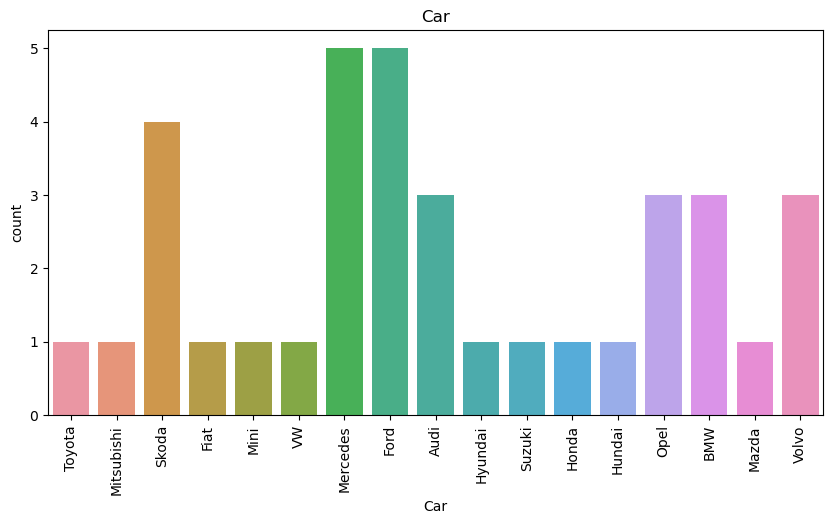

In [12]:
scaler = StandardScaler()
numerical = co.select_dtypes(include=['int64', 'float64']).columns
co[numerical] = scaler.fit_transform(co[numerical])

for column in co.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=co, x=column)
    plt.title(column)
    plt.xticks(rotation=90)
    plt.show()

This is the statistical number of each car brand in this data list. It is obvious that Chinese brands do not account for the majority. It is conceivable that it makes sense for the government to want to catch up in the new energy industry.

Although this is just a random sample of data, and the original sample of this data does not include the Chinese market, given that our purpose is international brand influence, using a sample that does not include mainland China market data may be more valuable for exploration and analysis.

### 4, Rrgression analyzing

The core of new energy vehicles is to improve the energy structure and avoid excessive use of fuel. Fortunately, the previous data table contains records of fuel volume and exhaust weight. We can analyze these data to find the correlation between energy and carbon dioxide emissions, so that we can understand the importance of the Chinese government on new energy vehicles. It is closely related to environmental protection.

Text(0, 0.5, 'Co2 emission')

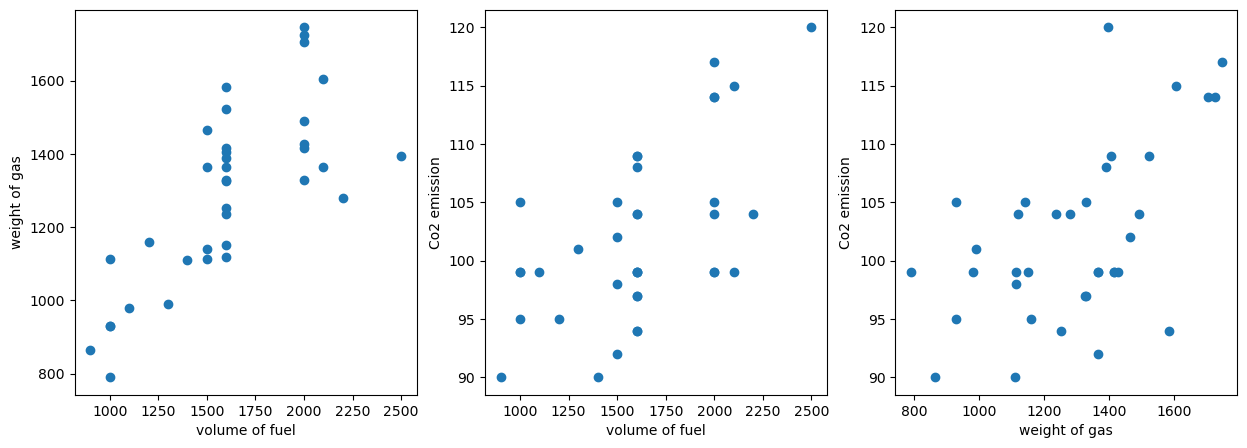

In [13]:
co=pd.read_csv('DATA.csv')
co= co.loc[:, ~co.columns.str.contains('^Unnamed')]
co=co.drop(['Model'],axis=1)
x=np.array(co['Volume']).reshape(-1,1)
y=np.array(co['Weight']).reshape(-1,1)
z=np.array(co['CO2']).reshape(-1,1)

fig, ax = plt.subplots(1,3,figsize=(15,5))
l= linear_model.LinearRegression()
l.fit(x,y)
l.fit(x,z)
l.fit(y,z)

ax[0].scatter(x,y)
ax[0].set_xlabel('volume of fuel')
ax[0].set_ylabel('weight of gas')

ax[1].scatter(x,z)
ax[1].set_xlabel('volume of fuel')
ax[1].set_ylabel('Co2 emission')

ax[2].scatter(y,z)
ax[2].set_xlabel('weight of gas')
ax[2].set_ylabel('Co2 emission')

In [24]:
scoreR=l.score(x,y)
scoreR

-24.589972039990542

In [25]:
l.score(x,z)

-0.2801890210508702

In [26]:
l.score(y,z)

0.30486966019513084

Judging from these three tables and the calculated R-squared value, the amount of oil and gas energy used by automobiles has a strong correlation with carbon dioxide emissions.

<Axes: >

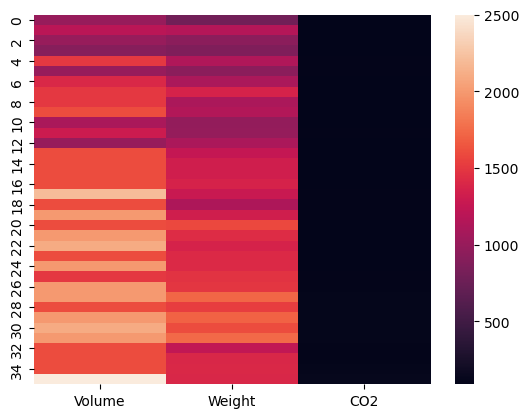

In [27]:
sns.heatmap(co.drop(['Car'],axis=1))

The classification of new energy is roughly BEV and PHEV. These classifications were invented to reduce the proportion of oil and gas. Combined with the calculated data, we can already determine that the improvement of new energy is closely related to environmental governance.

#### SVM use

In [42]:
train,test=train_test_split(co,test_size=0.2)

train_X=np.array(train['Volume']).reshape(-1,1)
test_X=np.array(test['Volume']).reshape(-1,1)

train_Y=np.array(train['Weight']).reshape(-1,1)
test_Y=np.array(test['Weight']).reshape(-1,1)

In [44]:
s=StandardScaler()
train_X=s.fit_transform(train_X)
test_X=s.fit_transform(test_X)

In [46]:
model=SVC()
model.fit(train_X,train_Y)

prediction=model.predict(test_X)
prediction

/Users/a20180815799/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1365, 1112, 1112, 1365, 1365, 1365, 1365, 1112])

In [50]:
accuracy_score(test_Y,prediction)

0.0

I want to try the machine learning of support vector machines, but here it is more about practicing how to use its code. Support vector machines can essentially play a role in nonlinear and high-dimensional models. The data I used this time Very intuitive and common, strictly speaking this method is not needed.

Just like the accuracy I finally calculated, it is completely meaningless 0. According to this data test, using SVM is indeed not necessary. It's more about trying practical applications.

### 5, Summary

New energy is a key part of the future automobile industry entering a new era. Although this analysis focuses on analyzing the reasons for the development of new energy vehicles in China, this example can be seen as a microcosm of the entire world's treatment of new energy vehicles.The greatest value of new energy is to promote environmental protection and long-term substitutability of energy supply. People no longer need to excessively use fuels such as fuel to cause excessive exhaust emissions. We can use electricity or hybrid power to increase the efficiency of cars and Ensure natural circulation. China is now moving towards this goal. I hope that this can serve as a reference for other people in the world to contribute value to this new energy industry together, just like China and like my family.

## Reference

Kaggle: 'IEA-EV-dataEV salesCarsHistorical.csv', 'Carbon_(CO2)_Emissions_by_Country.csv', 'DATA.csv'

Relavant article: https://theicct.org/wp-content/uploads/2021/06/China-green-future-ev-jan2021.pdf

SVM: https://blog.csdn.net/Claire_chen_jia/article/details/110916001

Referred Project: https://rayzhangzirui.github.io/math10sp24/final_project_demo/zhaomickey.html

https://rayzhangzirui.github.io/math10sp24/final_project_demo/zhangzhiwei.html